In [1]:
from mec_env_var import *
from helper import *
import tensorflow as tf
import ipdb as pdb
import time

for i in range(1):
    
    print('---------' + str(i) + '------------')
    
    MAX_EPISODE = 2000
    MAX_EPISODE_LEN = 200

    NUM_T = 1
    NUM_R = 4
    SIGMA2 = 1e-9

    t_factor = 0.9
    noise_sigma = 0.12

    config = {'state_dim':3, 'action_dim':2};
    train_config = {'minibatch_size':64, 'actor_lr':0.0001, 'tau':0.001, 
                    'critic_lr':0.001, 'gamma':0.99, 'buffer_size':250000, 
                    'random_seed':int(time.clock()*1000%1000), 'noise_sigma':noise_sigma, 'sigma2':SIGMA2}
    user_config = [{'id':'1', 'model':'AR', 'num_r':NUM_R, 'rate':3.0, 'dis':100, 'action_bound':2, 
                    'data_buf_size':100, 't_factor':t_factor, 'penalty':1000}]

    print(user_config)

    # 1. include all user in the system according to the user_config
    user_list = [];
    for info in user_config:
        info.update(config)
        user_list.append(MecTermGD(info, train_config, 'offload'))
        print('Initialization OK!----> user ' + info['id'])

    # 2. create the simulation env
    env = MecSvrEnv(user_list, NUM_R, SIGMA2, MAX_EPISODE_LEN)

    # #Create a saver object which will save all the variables
    # saver = tf.train.Saver() 

    res_r = []
    res_p = []
    res_b = []
    res_o = []
    res_d = []
    # 3. start to explore for each episode
    for i in range(MAX_EPISODE):

        cur_init_ds_ep = env.reset()

        cur_r_ep = np.zeros(len(user_list))
        cur_p_ep = np.zeros(len(user_list))
        cur_op_ep = np.zeros(len(user_list))
        cur_ts_ep = np.zeros(len(user_list))
        cur_ps_ep = np.zeros(len(user_list))
        cur_rs_ep = np.zeros(len(user_list))
        cur_ds_ep = np.zeros(len(user_list))
        cur_ch_ep = np.zeros(len(user_list))
        cur_of_ep = np.zeros(len(user_list))

        for j in range(MAX_EPISODE_LEN):

            # first try to transmit from current state
            [cur_r, done, cur_p, cur_op, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of] = env.step_transmit()

            cur_r_ep += cur_r
            cur_p_ep += cur_p
            cur_op_ep += cur_op
            cur_ts_ep += cur_ts
            cur_ps_ep += cur_ps
            cur_rs_ep += cur_rs
            cur_ds_ep += cur_ds
            cur_ch_ep += cur_ch
            cur_of_ep += cur_of


            if done:
                res_r.append(cur_r_ep/MAX_EPISODE_LEN)
                res_p.append(cur_p_ep/MAX_EPISODE_LEN)
                res_b.append(cur_ds_ep/MAX_EPISODE_LEN)
                res_o.append(cur_of_ep/MAX_EPISODE_LEN)
                res_d.append(cur_ds)
                print('%d:r:%s,p:%s,op:%s,tr:%s,pr:%s,rev:%s,dbuf:%s,ch:%s,ibuf:%s,rbuf:%s' % (i, cur_r_ep/MAX_EPISODE_LEN, cur_p_ep/MAX_EPISODE_LEN, cur_op_ep/MAX_EPISODE_LEN, cur_ts_ep/MAX_EPISODE_LEN, cur_ps_ep/MAX_EPISODE_LEN, cur_rs_ep/MAX_EPISODE_LEN, cur_ds_ep/MAX_EPISODE_LEN, cur_ch_ep/MAX_EPISODE_LEN, cur_init_ds_ep, cur_ds))

    name = 't_nB_OGD/test_1000_' + time.strftime("%b_%d_%Y_%H_%M_%S", time.localtime(time.time()))
    np.savez(name, res_r, res_p, res_b, res_o, res_d)
    

---------0------------
[{'penalty': 1000, 'num_r': 4, 'rate': 3.0, 'action_bound': 2, 'data_buf_size': 100, 'model': 'AR', 'id': '1', 't_factor': 0.9, 'dis': 100}]
Initialization OK!----> user 1
0:r:[-16.437381],p:[1.79281804],op:[0.],tr:[2.22093706],pr:[0.69656294],rev:[2.915],dbuf:[3.02018604],ch:[3.23333507],ibuf:[5.5],rbuf:[5.]
1:r:[-15.38445739],p:[1.67441905],op:[0.],tr:[2.05855918],pr:[0.66894082],rev:[2.615],dbuf:[3.14685925],ch:[3.64180734],ibuf:[22.5],rbuf:[1.77635684e-15]
2:r:[-18.97932937],p:[2.06765109],op:[0.],tr:[2.32655216],pr:[0.99328235],rev:[3.275],dbuf:[3.70469602],ch:[4.05701991],ibuf:[11.0],rbuf:[2.0330964]
3:r:[-16.58902018],p:[1.79142252],op:[0.],tr:[2.56742133],pr:[0.68507867],rev:[3.015],dbuf:[4.66217459],ch:[4.59011435],ibuf:[48.5],rbuf:[1.]
4:r:[-16.8791774],p:[1.83765917],op:[0.],tr:[2.48131287],pr:[0.74618713],rev:[3.21],dbuf:[3.40244894],ch:[3.98181229],ibuf:[7.5],rbuf:[4.]
5:r:[-17.48779322],p:[1.90342414],op:[0.],tr:[2.18976746],pr:[0.82023254],rev:[2.8

60:r:[-15.53839585],p:[1.69340821],op:[0.],tr:[2.26050301],pr:[0.63199699],rev:[2.845],dbuf:[2.97721967],ch:[3.4387388],ibuf:[11.5],rbuf:[2.]
61:r:[-14.30674457],p:[1.55681316],op:[0.],tr:[2.32407706],pr:[0.52092294],rev:[2.78],dbuf:[2.95426148],ch:[4.23780545],ibuf:[16.0],rbuf:[3.]
62:r:[-17.99091984],p:[1.94611469],op:[0.],tr:[2.28557023],pr:[0.86942977],rev:[2.935],dbuf:[4.75887586],ch:[3.68597156],ibuf:[47.0],rbuf:[3.]
63:r:[-16.8883943],p:[1.83913949],op:[0.],tr:[2.44010451],pr:[0.75072466],rev:[3.17],dbuf:[3.36138883],ch:[4.00807006],ibuf:[9.0],rbuf:[4.83416754]
64:r:[-15.66443228],p:[1.70426735],op:[0.],tr:[2.37258435],pr:[0.72480603],rev:[3.08],dbuf:[3.26026178],ch:[4.59576495],ibuf:[9.5],rbuf:[6.02192241]
65:r:[-15.28313337],p:[1.66408132],op:[0.],tr:[2.35501157],pr:[0.63498843],rev:[2.96],dbuf:[3.06401522],ch:[4.16085664],ibuf:[7.0],rbuf:[1.]
66:r:[-17.14702855],p:[1.84832119],op:[0.],tr:[2.34215883],pr:[0.78034117],rev:[2.915],dbuf:[5.12137825],ch:[4.00807755],ibuf:[42.5],rb

120:r:[-17.45294312],p:[1.90200634],op:[0.],tr:[2.32808327],pr:[0.79928163],rev:[3.14],dbuf:[3.34886101],ch:[3.53213153],ibuf:[3.5],rbuf:[6.02702073]
121:r:[-15.87373166],p:[1.72671545],op:[0.],tr:[2.40293029],pr:[0.72956971],rev:[3.085],dbuf:[3.33292622],ch:[4.94379657],ibuf:[12.5],rbuf:[3.]
122:r:[-17.25946195],p:[1.87802035],op:[0.],tr:[2.4179026],pr:[0.78459404],rev:[3.175],dbuf:[3.57278768],ch:[4.50387789],ibuf:[14.0],rbuf:[8.50067157]
123:r:[-16.93874575],p:[1.83899126],op:[0.],tr:[2.37993431],pr:[0.81756569],rev:[3.07],dbuf:[3.87824429],ch:[4.37077954],ibuf:[27.5],rbuf:[2.]
124:r:[-17.06495372],p:[1.85261027],op:[0.],tr:[2.30863654],pr:[0.82636346],rev:[2.975],dbuf:[3.91461333],ch:[4.34448016],ibuf:[32.0],rbuf:[2.22044605e-16]
125:r:[-13.38901117],p:[1.45480488],op:[0.],tr:[2.40406388],pr:[0.49343612],rev:[2.89],dbuf:[2.95767248],ch:[4.74040373],ibuf:[4.5],rbuf:[3.]
126:r:[-16.01330086],p:[1.74429182],op:[0.],tr:[2.24210802],pr:[0.73789198],rev:[2.935],dbuf:[3.14674513],ch:[4.20

180:r:[-15.0976657],p:[1.63719455],op:[0.],tr:[2.31653999],pr:[0.66846001],rev:[2.855],dbuf:[3.62914738],ch:[4.74710654],ibuf:[28.0],rbuf:[2.]
181:r:[-17.68679603],p:[1.90625579],op:[0.],tr:[2.33175791],pr:[0.85074209],rev:[2.98],dbuf:[5.30493951],ch:[3.9638147],ibuf:[43.5],rbuf:[3.]
182:r:[-17.9136084],p:[1.94176439],op:[0.],tr:[2.43761757],pr:[0.80988243],rev:[3.065],dbuf:[4.37728906],ch:[3.90445592],ibuf:[41.5],rbuf:[5.]
183:r:[-16.74064525],p:[1.81164812],op:[0.],tr:[2.31068235],pr:[0.74431765],rev:[2.82],dbuf:[4.35812154],ch:[3.94648888],ibuf:[49.0],rbuf:[2.]
184:r:[-17.26109078],p:[1.88273586],op:[0.],tr:[2.09524458],pr:[0.82975542],rev:[2.895],dbuf:[3.16468066],ch:[3.2330862],ibuf:[8.0],rbuf:[2.]
185:r:[-18.94731833],p:[2.06937815],op:[0.],tr:[2.01490679],pr:[0.96509321],rev:[2.91],dbuf:[3.22915008],ch:[2.69331196],ibuf:[15.0],rbuf:[1.]
186:r:[-18.14716558],p:[1.97833086],op:[0.],tr:[2.28752375],pr:[0.84747625],rev:[3.07],dbuf:[3.42187853],ch:[3.39550541],ibuf:[15.0],rbuf:[2.]
1

240:r:[-20.51585316],p:[2.22685175],op:[0.],tr:[2.22606517],pr:[1.01893483],rev:[3.025],dbuf:[4.74187385],ch:[2.79955246],ibuf:[47.0],rbuf:[3.]
241:r:[-17.34373449],p:[1.88512899],op:[0.],tr:[2.3825732],pr:[0.7724268],rev:[3.055],dbuf:[3.77573608],ch:[3.66038475],ibuf:[21.0],rbuf:[1.]
242:r:[-18.57242949],p:[2.02714856],op:[0.],tr:[2.18576745],pr:[0.89673255],rev:[3.025],dbuf:[3.2809243],ch:[3.09541948],ibuf:[11.5],rbuf:[6.66133815e-16]
243:r:[-15.71384038],p:[1.7108422],op:[0.],tr:[2.38287714],pr:[0.64212286],rev:[3.025],dbuf:[3.16260546],ch:[4.05842082],ibuf:[4.0],rbuf:[4.]
244:r:[-15.84215807],p:[1.71965847],op:[0.],tr:[2.43125532],pr:[0.67624468],rev:[3.01],dbuf:[3.65231845],ch:[4.44147598],ibuf:[22.5],rbuf:[3.]
245:r:[-14.53801473],p:[1.58337],op:[0.],tr:[2.26086426],pr:[0.56163574],rev:[2.795],dbuf:[2.87684682],ch:[4.11681635],ibuf:[8.5],rbuf:[3.]
246:r:[-16.98496894],p:[1.82820367],op:[0.],tr:[2.33315631],pr:[0.77434369],rev:[2.87],dbuf:[5.31135925],ch:[3.90118625],ibuf:[48.5],r

298:r:[-15.44236347],p:[1.68058424],op:[0.],tr:[2.42216666],pr:[0.65033334],rev:[3.045],dbuf:[3.17105274],ch:[4.73953941],ibuf:[10.5],rbuf:[5.]
299:r:[-15.39926061],p:[1.67451946],op:[0.],tr:[2.45030873],pr:[0.68969127],rev:[3.05],dbuf:[3.28585496],ch:[4.78029404],ibuf:[21.0],rbuf:[3.]
300:r:[-18.51879464],p:[2.01257779],op:[0.],tr:[2.22948496],pr:[0.87301504],rev:[2.955],dbuf:[4.05594497],ch:[2.94036583],ibuf:[30.5],rbuf:[1.]
301:r:[-17.03952204],p:[1.84662981],op:[0.],tr:[2.19047331],pr:[0.75452669],rev:[2.76],dbuf:[4.19853788],ch:[3.39288289],ibuf:[39.0],rbuf:[2.]
302:r:[-16.3278612],p:[1.77921261],op:[0.],tr:[2.36958021],pr:[0.67041979],rev:[3.04],dbuf:[3.14947664],ch:[3.78961761],ibuf:[5.0],rbuf:[5.]
303:r:[-17.56597545],p:[1.91349917],op:[0.],tr:[2.31476167],pr:[0.81023833],rev:[3.055],dbuf:[3.44482958],ch:[3.46104248],ibuf:[15.0],rbuf:[1.]
304:r:[-17.05533756],p:[1.83402965],op:[0.],tr:[2.37120826],pr:[0.79629174],rev:[2.95],dbuf:[5.49070701],ch:[4.44716234],ibuf:[45.5],rbuf:[2.

358:r:[-17.00783563],p:[1.83464503],op:[0.],tr:[2.61091543],pr:[0.76158457],rev:[3.16],dbuf:[4.96030324],ch:[5.0082652],ibuf:[44.5],rbuf:[2.]
359:r:[-17.6495798],p:[1.92481453],op:[0.],tr:[2.23560798],pr:[0.83439202],rev:[3.03],dbuf:[3.26249043],ch:[3.43111673],ibuf:[9.0],rbuf:[1.]
360:r:[-14.84022995],p:[1.61274102],op:[0.],tr:[2.54283782],pr:[0.57540654],rev:[3.025],dbuf:[3.25560785],ch:[5.16305148],ibuf:[20.5],rbuf:[1.85112937]
361:r:[-19.30663736],p:[2.10462625],op:[0.],tr:[2.24901776],pr:[0.95098224],rev:[3.1],dbuf:[3.65001136],ch:[3.20056653],ibuf:[20.0],rbuf:[3.55271368e-15]
362:r:[-16.43985317],p:[1.79220449],op:[0.],tr:[2.30355843],pr:[0.71144157],rev:[3.005],dbuf:[3.10012731],ch:[3.6004059],ibuf:[6.0],rbuf:[4.]
363:r:[-14.75457993],p:[1.60516245],op:[0.],tr:[2.45253938],pr:[0.57246062],rev:[3.015],dbuf:[3.08117853],ch:[4.80633479],ibuf:[9.0],rbuf:[7.]
364:r:[-15.6102791],p:[1.69318714],op:[0.],tr:[2.55929305],pr:[0.64820695],rev:[3.03],dbuf:[3.71594876],ch:[5.0738747],ibuf:[3

418:r:[-20.57499997],p:[2.24408501],op:[0.],tr:[2.26241671],pr:[1.09008329],rev:[3.285],dbuf:[3.78234884],ch:[3.09178945],ibuf:[16.5],rbuf:[3.]
419:r:[-21.04423101],p:[2.27921598],op:[0.],tr:[2.305255],pr:[1.089745],rev:[3.185],dbuf:[5.31287214],ch:[3.17313545],ibuf:[43.0],rbuf:[1.]
420:r:[-16.06615392],p:[1.73964278],op:[0.],tr:[2.35796503],pr:[0.72203497],rev:[2.935],dbuf:[4.09368886],ch:[4.77189022],ibuf:[32.0],rbuf:[3.]
421:r:[-16.83020851],p:[1.83568721],op:[0.],tr:[2.21295463],pr:[0.76954537],rev:[2.95],dbuf:[3.0902363],ch:[3.38046337],ibuf:[8.5],rbuf:[2.]
422:r:[-17.7205086],p:[1.91882729],op:[0.],tr:[2.43276408],pr:[0.81723592],rev:[3.03],dbuf:[4.51062992],ch:[3.91069235],ibuf:[45.0],rbuf:[1.]
423:r:[-16.40568369],p:[1.78627966],op:[0.],tr:[2.36311053],pr:[0.70188947],rev:[2.99],dbuf:[3.2916672],ch:[3.79012499],ibuf:[15.0],rbuf:[8.8817842e-16]
424:r:[-18.32653066],p:[1.98607781],op:[0.],tr:[2.49608708],pr:[0.87021102],rev:[3.2],dbuf:[4.51830407],ch:[4.18314034],ibuf:[35.0],rbuf

478:r:[-17.90208334],p:[1.94649803],op:[0.],tr:[2.38722464],pr:[0.86277536],rev:[3.1],dbuf:[3.83601052],ch:[3.83446608],ibuf:[33.0],rbuf:[3.]
479:r:[-17.21257896],p:[1.87502208],op:[0.],tr:[2.30249879],pr:[0.82224948],rev:[3.07],dbuf:[3.37380271],ch:[3.72719789],ibuf:[13.5],rbuf:[2.55034471]
480:r:[-18.06805616],p:[1.9711545],op:[0.],tr:[2.32871504],pr:[0.82128496],rev:[3.13],dbuf:[3.27665671],ch:[3.46137603],ibuf:[6.0],rbuf:[2.]
481:r:[-18.11110777],p:[1.94458648],op:[0.],tr:[2.45816475],pr:[0.86183525],rev:[3.1],dbuf:[6.09829496],ch:[4.46107919],ibuf:[45.0],rbuf:[1.]
482:r:[-18.50281696],p:[2.01855084],op:[0.],tr:[2.30660199],pr:[0.88339801],rev:[3.2],dbuf:[3.35859392],ch:[3.11916502],ibuf:[4.0],rbuf:[6.]
483:r:[-14.3626943],p:[1.56151307],op:[0.],tr:[2.45646062],pr:[0.55103938],rev:[3.],dbuf:[3.09076711],ch:[4.62252669],ibuf:[4.5],rbuf:[3.]
484:r:[-16.39174221],p:[1.787231],op:[0.],tr:[2.18760902],pr:[0.73239098],rev:[2.875],dbuf:[3.06663193],ch:[3.492963],ibuf:[12.0],rbuf:[3.]
485:

538:r:[-18.08577881],p:[1.94653104],op:[0.],tr:[2.31324169],pr:[0.83425831],rev:[2.94],dbuf:[5.66999437],ch:[3.50976363],ibuf:[46.5],rbuf:[5.]
539:r:[-17.99568168],p:[1.93377227],op:[0.],tr:[2.40563853],pr:[0.82436147],rev:[3.02],dbuf:[5.9173125],ch:[3.8916417],ibuf:[44.0],rbuf:[2.]
540:r:[-19.77393784],p:[2.14352774],op:[0.],tr:[2.43797775],pr:[0.99737845],rev:[3.23],dbuf:[4.82188227],ch:[3.45980338],ibuf:[45.5],rbuf:[4.42875927]
541:r:[-15.53866011],p:[1.69382514],op:[0.],tr:[2.20886138],pr:[0.64113862],rev:[2.83],dbuf:[2.94233868],ch:[3.70670888],ibuf:[5.0],rbuf:[1.]
542:r:[-17.83758003],p:[1.93163692],op:[0.],tr:[2.28404181],pr:[0.82595819],rev:[2.9],dbuf:[4.52847738],ch:[3.66784738],ibuf:[44.0],rbuf:[2.]
543:r:[-18.33837607],p:[1.97473035],op:[0.],tr:[2.27779965],pr:[0.87220035],rev:[2.95],dbuf:[5.65802913],ch:[3.69039751],ibuf:[41.0],rbuf:[1.]
544:r:[-18.4294576],p:[2.00256272],op:[0.],tr:[2.23810721],pr:[0.87689279],rev:[2.99],dbuf:[4.06393081],ch:[3.36776318],ibuf:[30.0],rbuf:[

598:r:[-19.99226689],p:[2.16690967],op:[0.],tr:[2.33020214],pr:[0.99229786],rev:[3.1],dbuf:[4.90079882],ch:[3.27446066],ibuf:[46.5],rbuf:[2.]
599:r:[-17.82124413],p:[1.94395397],op:[0.],tr:[2.24002585],pr:[0.83589954],rev:[3.055],dbuf:[3.25658418],ch:[3.53653487],ibuf:[6.0],rbuf:[1.81492248]
600:r:[-16.42632966],p:[1.78765223],op:[0.],tr:[2.29908969],pr:[0.73841031],rev:[2.965],dbuf:[3.37459574],ch:[3.89647409],ibuf:[16.5],rbuf:[2.]
601:r:[-18.85821842],p:[2.05803526],op:[0.],tr:[2.19254355],pr:[0.87245645],rev:[2.975],dbuf:[3.35901085],ch:[2.82778122],ibuf:[19.0],rbuf:[1.]
602:r:[-19.07729871],p:[2.05239014],op:[0.],tr:[2.11601227],pr:[0.94898773],rev:[2.91],dbuf:[6.05787457],ch:[3.15613029],ibuf:[37.0],rbuf:[6.]
603:r:[-15.58208695],p:[1.68771579],op:[0.],tr:[2.34913791],pr:[0.66086209],rev:[2.765],dbuf:[3.92644865],ch:[4.42586034],ibuf:[49.0],rbuf:[0.]
604:r:[-15.43774747],p:[1.67786574],op:[0.],tr:[2.44646386],pr:[0.63853614],rev:[3.085],dbuf:[3.36955804],ch:[4.44901199],ibuf:[1.0]

656:r:[-15.93073269],p:[1.73641551],op:[0.],tr:[2.24262521],pr:[0.69987479],rev:[2.93],dbuf:[3.02993096],ch:[3.65612405],ibuf:[4.5],rbuf:[2.]
657:r:[-16.16470687],p:[1.75652926],op:[0.],tr:[2.30474595],pr:[0.71275405],rev:[2.9],dbuf:[3.5594357],ch:[4.28681155],ibuf:[28.5],rbuf:[5.]
658:r:[-13.55331723],p:[1.46802563],op:[0.],tr:[2.37621684],pr:[0.53378316],rev:[2.75],dbuf:[3.41086559],ch:[4.96524767],ibuf:[35.0],rbuf:[3.]
659:r:[-19.30948154],p:[2.1052859],op:[0.],tr:[2.2158188],pr:[0.9516812],rev:[3.045],dbuf:[3.61908411],ch:[2.88535707],ibuf:[27.5],rbuf:[3.]
660:r:[-17.50922112],p:[1.89026313],op:[0.],tr:[2.30625967],pr:[0.80374033],rev:[2.88],dbuf:[4.96852948],ch:[3.64744598],ibuf:[49.0],rbuf:[3.]
661:r:[-13.04262965],p:[1.41479427],op:[0.],tr:[2.52363181],pr:[0.48103206],rev:[2.945],dbuf:[3.09481192],ch:[5.71303591],ibuf:[15.5],rbuf:[3.56722651]
662:r:[-18.06359041],p:[1.96842357],op:[0.],tr:[2.3526669],pr:[0.8323331],rev:[3.08],dbuf:[3.47778287],ch:[3.61484347],ibuf:[24.0],rbuf:[3

716:r:[-17.73955702],p:[1.92623207],op:[0.],tr:[2.50235249],pr:[0.82764751],rev:[3.2],dbuf:[4.03468347],ch:[4.51694676],ibuf:[34.0],rbuf:[8.]
717:r:[-17.67799334],p:[1.92677323],op:[0.],tr:[2.19416298],pr:[0.83333702],rev:[2.92],dbuf:[3.37034286],ch:[3.12463027],ibuf:[23.5],rbuf:[2.]
718:r:[-18.62799539],p:[2.03098521],op:[0.],tr:[2.32907344],pr:[0.92592656],rev:[3.215],dbuf:[3.49128457],ch:[4.11453256],ibuf:[8.0],rbuf:[0.]
719:r:[-18.45541991],p:[2.00843162],op:[0.],tr:[2.34165267],pr:[0.86834733],rev:[3.06],dbuf:[3.79535297],ch:[3.62251172],ibuf:[33.0],rbuf:[3.]
720:r:[-17.12839326],p:[1.86278818],op:[0.],tr:[2.33309455],pr:[0.77440545],rev:[2.985],dbuf:[3.63299651],ch:[3.78697488],ibuf:[25.5],rbuf:[1.]
721:r:[-15.7512265],p:[1.70178504],op:[0.],tr:[2.46339285],pr:[0.70410715],rev:[2.99],dbuf:[4.35161104],ch:[4.87848839],ibuf:[38.5],rbuf:[3.]
722:r:[-15.90936467],p:[1.72158767],op:[0.],tr:[2.47728168],pr:[0.74376626],rev:[3.08],dbuf:[4.15075668],ch:[4.86638223],ibuf:[33.0],rbuf:[4.79

773:r:[-18.53243146],p:[2.01590428],op:[0.],tr:[2.29069792],pr:[0.90680208],rev:[3.075],dbuf:[3.89292959],ch:[3.41271143],ibuf:[28.5],rbuf:[4.]
774:r:[-18.64431118],p:[2.02011333],op:[0.],tr:[2.38527381],pr:[0.91472619],rev:[3.13],dbuf:[4.63291256],ch:[3.90400329],ibuf:[38.0],rbuf:[4.]
775:r:[-16.68910423],p:[1.81565904],op:[0.],tr:[2.2752914],pr:[0.7322086],rev:[2.895],dbuf:[3.4817286],ch:[3.64719593],ibuf:[24.5],rbuf:[2.]
776:r:[-14.59986853],p:[1.5877523],op:[0.],tr:[2.47559352],pr:[0.53440648],rev:[3.02],dbuf:[3.10097864],ch:[4.52534692],ibuf:[3.0],rbuf:[5.]
777:r:[-17.5543165],p:[1.91340147],op:[0.],tr:[2.28358625],pr:[0.81391375],rev:[3.015],dbuf:[3.3370327],ch:[3.38715946],ibuf:[20.5],rbuf:[4.]
778:r:[-16.18538434],p:[1.7629897],op:[0.],tr:[2.34132866],pr:[0.70617134],rev:[3.02],dbuf:[3.18477008],ch:[4.02633292],ibuf:[8.5],rbuf:[3.]
779:r:[-17.19850791],p:[1.87268653],op:[0.],tr:[2.19839638],pr:[0.81910362],rev:[2.945],dbuf:[3.44329106],ch:[3.56581291],ibuf:[14.5],rbuf:[0.]
780:

833:r:[-15.98017223],p:[1.74005222],op:[0.],tr:[2.2873339],pr:[0.71193446],rev:[3.005],dbuf:[3.19702207],ch:[4.05009929],ibuf:[3.0],rbuf:[4.14632876]
834:r:[-15.26883044],p:[1.65165857],op:[0.],tr:[2.40629706],pr:[0.63870294],rev:[2.84],dbuf:[4.03903347],ch:[4.68161049],ibuf:[42.0],rbuf:[1.]
835:r:[-15.2855879],p:[1.66379648],op:[0.],tr:[2.44922107],pr:[0.61077893],rev:[3.06],dbuf:[3.11419611],ch:[4.06840008],ibuf:[3.0],rbuf:[3.]
836:r:[-16.89792204],p:[1.83438176],op:[0.],tr:[2.35356519],pr:[0.76643481],rev:[2.98],dbuf:[3.88486237],ch:[3.83731438],ibuf:[31.0],rbuf:[3.]
837:r:[-15.09815973],p:[1.64133241],op:[0.],tr:[2.45916751],pr:[0.66833249],rev:[3.14],dbuf:[3.26168026],ch:[4.74328622],ibuf:[0.5],rbuf:[3.]
838:r:[-13.27607964],p:[1.44161491],op:[0.],tr:[2.45036846],pr:[0.47963154],rev:[2.9],dbuf:[3.01545428],ch:[5.59991737],ibuf:[11.0],rbuf:[5.]
839:r:[-13.92475928],p:[1.51365432],op:[0.],tr:[2.32345829],pr:[0.58404171],rev:[2.85],dbuf:[3.01870366],ch:[5.04610176],ibuf:[15.5],rbuf:[

893:r:[-16.3271479],p:[1.77115205],op:[0.],tr:[2.33695144],pr:[0.7550437],rev:[2.95],dbuf:[3.86779467],ch:[4.17175288],ibuf:[29.0],rbuf:[0.60097345]
894:r:[-16.64455193],p:[1.81487122],op:[0.],tr:[2.10465609],pr:[0.77034391],rev:[2.875],dbuf:[3.10710924],ch:[3.5156323],ibuf:[2.0],rbuf:[2.]
895:r:[-16.58769124],p:[1.79315142],op:[0.],tr:[2.26255517],pr:[0.76494483],rev:[2.805],dbuf:[4.49328493],ch:[3.6847935],ibuf:[46.5],rbuf:[2.]
896:r:[-14.35495376],p:[1.56008966],op:[0.],tr:[2.31276302],pr:[0.59723698],rev:[2.885],dbuf:[3.14146791],ch:[5.62624916],ibuf:[8.0],rbuf:[3.]
897:r:[-15.01458185],p:[1.63498526],op:[0.],tr:[2.30595215],pr:[0.60154785],rev:[2.905],dbuf:[2.99714542],ch:[4.1203293],ibuf:[3.5],rbuf:[3.]
898:r:[-11.9631755],p:[1.29903377],op:[0.],tr:[2.31902461],pr:[0.39347539],rev:[2.67],dbuf:[2.7187154],ch:[5.4586068],ibuf:[9.5],rbuf:[1.]
899:r:[-15.62778457],p:[1.69432361],op:[0.],tr:[2.3208997],pr:[0.6891003],rev:[2.845],dbuf:[3.78872075],ch:[4.66172449],ibuf:[33.0],rbuf:[0.]


953:r:[-16.74444421],p:[1.82531839],op:[0.],tr:[2.24057855],pr:[0.74380147],rev:[2.915],dbuf:[3.1657872],ch:[3.49513379],ibuf:[16.0],rbuf:[2.12399602]
954:r:[-18.88791445],p:[2.03920426],op:[0.],tr:[2.32982606],pr:[0.91195969],rev:[3.07],dbuf:[5.35076133],ch:[3.56323617],ibuf:[39.5],rbuf:[5.14284969]
955:r:[-16.65816178],p:[1.81241792],op:[0.],tr:[2.38896401],pr:[0.78603599],rev:[3.13],dbuf:[3.46400467],ch:[4.64126348],ibuf:[12.0],rbuf:[3.]
956:r:[-18.44457892],p:[1.99256858],op:[0.],tr:[2.47250428],pr:[0.84499572],rev:[3.09],dbuf:[5.11461678],ch:[3.82687399],ibuf:[47.5],rbuf:[2.]
957:r:[-16.73208431],p:[1.81705241],op:[0.],tr:[2.31940356],pr:[0.76559644],rev:[2.955],dbuf:[3.78612634],ch:[4.08730362],ibuf:[28.0],rbuf:[2.]
958:r:[-17.16499661],p:[1.86996762],op:[0.],tr:[2.29465403],pr:[0.74438669],rev:[2.945],dbuf:[3.35287991],ch:[3.4457123],ibuf:[23.0],rbuf:[4.19185631]
959:r:[-16.24682139],p:[1.76462077],op:[0.],tr:[2.41956192],pr:[0.75043808],rev:[3.06],dbuf:[3.65234462],ch:[4.149562

1013:r:[-18.92771159],p:[2.04211677],op:[0.],tr:[2.37848609],pr:[0.93901391],rev:[3.13],dbuf:[5.48660614],ch:[3.75488142],ibuf:[43.5],rbuf:[6.]
1014:r:[-14.50148864],p:[1.57456579],op:[0.],tr:[2.44346197],pr:[0.53653803],rev:[2.88],dbuf:[3.30396558],ch:[4.54270791],ibuf:[23.0],rbuf:[3.]
1015:r:[-14.83860774],p:[1.6091305],op:[0.],tr:[2.44036456],pr:[0.60963544],rev:[2.92],dbuf:[3.56433207],ch:[5.10123397],ibuf:[31.0],rbuf:[5.]
1016:r:[-17.81227339],p:[1.94298755],op:[0.],tr:[2.23352157],pr:[0.85647843],rev:[3.075],dbuf:[3.25385396],ch:[3.26189621],ibuf:[7.0],rbuf:[4.]
1017:r:[-16.8836748],p:[1.83182846],op:[0.],tr:[2.37996997],pr:[0.72753003],rev:[2.94],dbuf:[3.97218632],ch:[3.92681488],ibuf:[35.5],rbuf:[2.]
1018:r:[-17.40794984],p:[1.88778592],op:[0.],tr:[2.49049616],pr:[0.78950384],rev:[3.185],dbuf:[4.17876588],ch:[4.2087739],ibuf:[21.0],rbuf:[2.]
1019:r:[-18.25722626],p:[1.98050543],op:[0.],tr:[2.2462918],pr:[0.8712082],rev:[2.9],dbuf:[4.3267743],ch:[3.25599778],ibuf:[43.5],rbuf:[1.

1074:r:[-17.75684688],p:[1.93539885],op:[0.],tr:[2.35929322],pr:[0.82820678],rev:[3.19],dbuf:[3.38257199],ch:[3.68052998],ibuf:[3.5],rbuf:[4.]
1075:r:[-19.20402171],p:[2.08630782],op:[0.],tr:[2.38739099],pr:[0.97510901],rev:[3.21],dbuf:[4.27251331],ch:[3.56248474],ibuf:[32.5],rbuf:[2.]
1076:r:[-16.82667026],p:[1.83338621],op:[0.],tr:[2.31341448],pr:[0.77158552],rev:[3.065],dbuf:[3.26194328],ch:[3.63079553],ibuf:[9.0],rbuf:[5.]
1077:r:[-17.45004273],p:[1.89113659],op:[0.],tr:[2.31461693],pr:[0.81288307],rev:[2.98],dbuf:[4.29813398],ch:[3.89272044],ibuf:[32.5],rbuf:[3.]
1078:r:[-16.99598359],p:[1.84494435],op:[0.],tr:[2.24596842],pr:[0.77903158],rev:[2.835],dbuf:[3.91484439],ch:[3.653066],ibuf:[40.0],rbuf:[2.]
1079:r:[-17.23501621],p:[1.87487112],op:[0.],tr:[2.37761374],pr:[0.79988626],rev:[3.07],dbuf:[3.61176116],ch:[3.80238115],ibuf:[27.5],rbuf:[6.]
1080:r:[-17.53420535],p:[1.91085981],op:[0.],tr:[2.34689925],pr:[0.78310075],rev:[3.085],dbuf:[3.36467047],ch:[3.73435639],ibuf:[9.0],rbuf

1132:r:[-16.83364806],p:[1.83248475],op:[0.],tr:[2.48669593],pr:[0.7751994],rev:[3.26],dbuf:[3.41285306],ch:[4.4333799],ibuf:[2.5],rbuf:[2.12093331]
1133:r:[-15.1758102],p:[1.65137849],op:[0.],tr:[2.26249469],pr:[0.64500531],rev:[2.8],dbuf:[3.1340382],ch:[4.20067709],ibuf:[22.5],rbuf:[1.]
1134:r:[-13.66197085],p:[1.4852066],op:[0.],tr:[2.35321857],pr:[0.46678143],rev:[2.735],dbuf:[2.95111456],ch:[4.45791935],ibuf:[19.0],rbuf:[2.]
1135:r:[-15.81327815],p:[1.71980172],op:[0.],tr:[2.57292311],pr:[0.67707689],rev:[3.24],dbuf:[3.35062672],ch:[4.90622679],ibuf:[6.0],rbuf:[4.]
1136:r:[-17.39686071],p:[1.8987266],op:[0.],tr:[2.16624727],pr:[0.74875273],rev:[2.89],dbuf:[3.08321335],ch:[3.01422906],ibuf:[7.0],rbuf:[2.]
1137:r:[-18.9181878],p:[2.03458942],op:[0.],tr:[2.28183291],pr:[0.94066709],rev:[3.005],dbuf:[6.06882995],ch:[3.39610363],ibuf:[47.5],rbuf:[4.]
1138:r:[-15.12686764],p:[1.64672957],op:[0.],tr:[2.2788914],pr:[0.6336086],rev:[2.925],dbuf:[3.06301491],ch:[4.03257753],ibuf:[1.5],rbuf:

1192:r:[-16.68357545],p:[1.81073793],op:[0.],tr:[2.59372918],pr:[0.72627082],rev:[3.2],dbuf:[3.8693411],ch:[5.0902349],ibuf:[27.0],rbuf:[3.]
1193:r:[-14.83493098],p:[1.61527134],op:[0.],tr:[2.22123681],pr:[0.65126319],rev:[2.85],dbuf:[2.97488961],ch:[3.98395264],ibuf:[5.5],rbuf:[1.]
1194:r:[-18.60983871],p:[2.01773393],op:[0.],tr:[2.28423991],pr:[0.88576009],rev:[2.97],dbuf:[4.50233359],ch:[3.51815385],ibuf:[42.0],rbuf:[2.]
1195:r:[-16.89450149],p:[1.83263846],op:[0.],tr:[2.30246197],pr:[0.79503803],rev:[2.965],dbuf:[4.00755361],ch:[3.96167485],ibuf:[32.5],rbuf:[6.]
1196:r:[-18.20894749],p:[1.97754756],op:[0.],tr:[2.48712035],pr:[0.86287965],rev:[3.245],dbuf:[4.11019417],ch:[4.04708178],ibuf:[25.0],rbuf:[4.]
1197:r:[-16.64638767],p:[1.81100782],op:[0.],tr:[2.55579563],pr:[0.71920437],rev:[3.19],dbuf:[3.47317249],ch:[4.26852752],ibuf:[20.0],rbuf:[3.]
1198:r:[-14.25470881],p:[1.54860355],op:[0.],tr:[2.41064188],pr:[0.58435812],rev:[2.935],dbuf:[3.17276869],ch:[4.62287039],ibuf:[17.0],rbu

1252:r:[-15.27543081],p:[1.66302071],op:[0.],tr:[2.33349178],pr:[0.59500092],rev:[2.925],dbuf:[3.08244401],ch:[3.85536615],ibuf:[2.0],rbuf:[1.30145895]
1253:r:[-15.98525015],p:[1.74118989],op:[0.],tr:[2.35774568],pr:[0.68725432],rev:[3.],dbuf:[3.145411],ch:[3.88708779],ibuf:[13.0],rbuf:[4.]
1254:r:[-17.13042284],p:[1.85790116],op:[0.],tr:[2.4076552],pr:[0.7523448],rev:[2.935],dbuf:[4.09312415],ch:[3.90081929],ibuf:[46.0],rbuf:[1.]
1255:r:[-17.30318127],p:[1.88109176],op:[0.],tr:[2.28647875],pr:[0.78852125],rev:[2.935],dbuf:[3.73355456],ch:[3.45605141],ibuf:[31.0],rbuf:[3.]
1256:r:[-16.26848948],p:[1.75337972],op:[0.],tr:[2.29337625],pr:[0.73162375],rev:[2.915],dbuf:[4.88072025],ch:[4.32043653],ibuf:[26.0],rbuf:[4.]
1257:r:[-15.99807965],p:[1.74211946],op:[0.],tr:[2.31876857],pr:[0.73373143],rev:[3.025],dbuf:[3.19004487],ch:[4.43533659],ibuf:[9.5],rbuf:[4.]
1258:r:[-15.65474205],p:[1.70104695],op:[0.],tr:[2.50283322],pr:[0.68966678],rev:[3.14],dbuf:[3.45319467],ch:[4.75639132],ibuf:[18.

1309:r:[-17.52082881],p:[1.90081481],op:[0.],tr:[2.47608107],pr:[0.79801158],rev:[3.1],dbuf:[4.13495485],ch:[4.17934456],ibuf:[37.0],rbuf:[2.18147056]
1310:r:[-15.9794995],p:[1.73272112],op:[0.],tr:[2.48798385],pr:[0.68201615],rev:[3.05],dbuf:[3.85009377],ch:[4.47608649],ibuf:[26.0],rbuf:[2.]
1311:r:[-13.51997797],p:[1.46987153],op:[0.],tr:[2.36862529],pr:[0.50137471],rev:[2.86],dbuf:[2.9113423],ch:[4.78849693],ibuf:[4.0],rbuf:[2.]
1312:r:[-15.74747763],p:[1.71437247],op:[0.],tr:[2.24062884],pr:[0.75437116],rev:[2.955],dbuf:[3.18125377],ch:[4.17472117],ibuf:[10.0],rbuf:[2.]
1313:r:[-18.13525943],p:[1.97332848],op:[0.],tr:[2.25754745],pr:[0.83005676],rev:[2.92],dbuf:[3.75303065],ch:[3.51084956],ibuf:[36.5],rbuf:[2.97915877]
1314:r:[-18.55529421],p:[2.00969723],op:[0.],tr:[2.29566064],pr:[0.90683936],rev:[3.01],dbuf:[4.68019177],ch:[3.38414931],ibuf:[40.5],rbuf:[2.]
1315:r:[-14.51002082],p:[1.56039284],op:[0.],tr:[2.35027294],pr:[0.62472706],rev:[2.765],dbuf:[4.66485259],ch:[5.346323],ib

1369:r:[-17.52534275],p:[1.90989842],op:[0.],tr:[2.42792298],pr:[0.78707702],rev:[3.21],dbuf:[3.36256929],ch:[3.84006781],ibuf:[4.0],rbuf:[3.]
1370:r:[-16.93118716],p:[1.84371893],op:[0.],tr:[2.24792894],pr:[0.75957106],rev:[2.995],dbuf:[3.3771675],ch:[3.76282514],ibuf:[6.5],rbuf:[4.]
1371:r:[-16.88622462],p:[1.83963521],op:[0.],tr:[2.26473628],pr:[0.74276372],rev:[2.915],dbuf:[3.295077],ch:[3.30679283],ibuf:[22.5],rbuf:[4.]
1372:r:[-16.92620526],p:[1.83293688],op:[0.],tr:[2.30608653],pr:[0.84141347],rev:[3.],dbuf:[4.2977334],ch:[4.16172943],ibuf:[32.5],rbuf:[3.]
1373:r:[-18.56602744],p:[1.9978671],op:[0.],tr:[2.4599555],pr:[0.8850445],rev:[3.135],dbuf:[5.85223555],ch:[3.84079522],ibuf:[45.0],rbuf:[3.]
1374:r:[-16.72614198],p:[1.8224969],op:[0.],tr:[2.34054708],pr:[0.75445292],rev:[3.05],dbuf:[3.23669837],ch:[3.94382016],ibuf:[10.0],rbuf:[1.]
1375:r:[-18.37008289],p:[1.96814827],op:[0.],tr:[2.29180593],pr:[0.87319407],rev:[2.99],dbuf:[6.56748506],ch:[3.77593809],ibuf:[41.0],rbuf:[6.]
1

1428:r:[-17.2830037],p:[1.87488057],op:[0.],tr:[2.30748782],pr:[0.84501218],rev:[3.015],dbuf:[4.09078569],ch:[3.82218451],ibuf:[30.5],rbuf:[3.]
1429:r:[-18.95717059],p:[2.04149655],op:[0.],tr:[2.52016329],pr:[0.90733671],rev:[3.19],dbuf:[5.83701651],ch:[4.17623842],ibuf:[48.5],rbuf:[1.]
1430:r:[-14.97425533],p:[1.6303701],op:[0.],tr:[2.32700143],pr:[0.58549857],rev:[2.845],dbuf:[3.00924472],ch:[4.0515094],ibuf:[14.5],rbuf:[1.]
1431:r:[-15.54508351],p:[1.69329821],op:[0.],tr:[2.23649477],pr:[0.65600523],rev:[2.905],dbuf:[3.05399631],ch:[3.83037252],ibuf:[3.5],rbuf:[6.]
1432:r:[-17.3346612],p:[1.88978869],op:[0.],tr:[2.25123376],pr:[0.82876624],rev:[3.04],dbuf:[3.26563032],ch:[3.28082163],ibuf:[11.0],rbuf:[3.]
1433:r:[-17.56396522],p:[1.89952179],op:[0.],tr:[2.34819141],pr:[0.79680859],rev:[2.94],dbuf:[4.68269108],ch:[4.03309314],ibuf:[43.0],rbuf:[2.]
1434:r:[-16.24887528],p:[1.75307715],op:[0.],tr:[2.46142667],pr:[0.72607333],rev:[2.97],dbuf:[4.71180942],ch:[4.67982803],ibuf:[46.5],rbuf

1488:r:[-15.894759],p:[1.72586745],op:[0.],tr:[2.48157292],pr:[0.67592708],rev:[3.03],dbuf:[3.61951974],ch:[4.56518622],ibuf:[27.5],rbuf:[2.]
1489:r:[-16.54193787],p:[1.7929035],op:[0.],tr:[2.51321816],pr:[0.71428184],rev:[3.025],dbuf:[4.05806329],ch:[4.33884968],ibuf:[45.5],rbuf:[5.]
1490:r:[-19.15491528],p:[2.05251238],op:[0.],tr:[2.51525187],pr:[0.92974813],rev:[3.21],dbuf:[6.82303864],ch:[4.27802462],ibuf:[49.0],rbuf:[2.]
1491:r:[-18.51509851],p:[2.01138142],op:[0.],tr:[2.19112075],pr:[0.90887925],rev:[2.955],dbuf:[4.12665714],ch:[3.26430189],ibuf:[35.0],rbuf:[6.]
1492:r:[-18.16700809],p:[1.96903388],op:[0.],tr:[2.37300497],pr:[0.90699503],rev:[3.095],dbuf:[4.45703129],ch:[4.06211143],ibuf:[41.0],rbuf:[4.]
1493:r:[-16.98639858],p:[1.85337301],op:[0.],tr:[2.19019647],pr:[0.76480353],rev:[2.885],dbuf:[3.06041441],ch:[3.09917777],ibuf:[16.0],rbuf:[2.]
1494:r:[-16.80664891],p:[1.82713178],op:[0.],tr:[2.3917297],pr:[0.7082703],rev:[2.975],dbuf:[3.62462888],ch:[3.723536],ibuf:[28.0],rbuf

1546:r:[-16.23664807],p:[1.7634071],op:[0.],tr:[2.20173901],pr:[0.71326099],rev:[2.725],dbuf:[3.65984129],ch:[3.57771198],ibuf:[39.0],rbuf:[1.]
1547:r:[-18.98911585],p:[2.06938988],op:[0.],tr:[2.0852045],pr:[0.9747955],rev:[2.95],dbuf:[3.64606882],ch:[2.89814194],ibuf:[24.0],rbuf:[2.]
1548:r:[-17.17968282],p:[1.87044918],op:[0.],tr:[2.36409072],pr:[0.80090928],rev:[3.075],dbuf:[3.45640228],ch:[3.86240192],ibuf:[21.0],rbuf:[3.]
1549:r:[-14.83950955],p:[1.6139776],op:[0.],tr:[2.40018111],pr:[0.62088339],rev:[3.],dbuf:[3.13711176],ch:[4.85003774],ibuf:[11.5],rbuf:[7.28710009]
1550:r:[-14.73658824],p:[1.60178363],op:[0.],tr:[2.2773324],pr:[0.6451676],rev:[2.855],dbuf:[3.20535574],ch:[4.41941985],ibuf:[18.5],rbuf:[5.]
1551:r:[-17.11289036],p:[1.85270559],op:[0.],tr:[2.32135923],pr:[0.73614077],rev:[2.86],dbuf:[4.38540049],ch:[3.51353662],ibuf:[40.5],rbuf:[1.]
1552:r:[-16.09909649],p:[1.75176451],op:[0.],tr:[2.34115992],pr:[0.70884008],rev:[2.975],dbuf:[3.33215928],ch:[3.92500708],ibuf:[17.0

1605:r:[-15.77092116],p:[1.70594974],op:[0.],tr:[2.30853193],pr:[0.66896807],rev:[2.775],dbuf:[4.17373509],ch:[3.77470038],ibuf:[45.5],rbuf:[5.]
1606:r:[-19.5232823],p:[2.12397151],op:[0.],tr:[2.37452937],pr:[0.99797063],rev:[3.285],dbuf:[4.07538746],ch:[3.66730305],ibuf:[21.5],rbuf:[4.]
1607:r:[-17.94095255],p:[1.9553046],op:[0.],tr:[2.2880541],pr:[0.8544459],rev:[3.07],dbuf:[3.43211187],ch:[3.44085185],ibuf:[16.5],rbuf:[2.]
1608:r:[-14.83217125],p:[1.60447342],op:[0.],tr:[2.52344854],pr:[0.60905146],rev:[2.95],dbuf:[3.91910484],ch:[5.47815124],ibuf:[38.5],rbuf:[2.]
1609:r:[-18.65454667],p:[2.01138136],op:[0.],tr:[2.39346844],pr:[0.89903156],rev:[3.095],dbuf:[5.52114438],ch:[4.07149093],ibuf:[43.5],rbuf:[4.]
1610:r:[-16.47345546],p:[1.76949742],op:[0.],tr:[2.41958229],pr:[0.76291771],rev:[2.97],dbuf:[5.47978666],ch:[4.8799819],ibuf:[46.5],rbuf:[4.]
1611:r:[-14.50135237],p:[1.57802649],op:[0.],tr:[2.29708683],pr:[0.59791317],rev:[2.92],dbuf:[2.99113952],ch:[4.17219714],ibuf:[0.0],rbuf:

1662:r:[-15.3457069],p:[1.67251035],op:[0.],tr:[2.18432867],pr:[0.66817133],rev:[2.84],dbuf:[2.9311373],ch:[3.72855726],ibuf:[4.5],rbuf:[2.]
1663:r:[-17.68968733],p:[1.91545972],op:[0.],tr:[2.33963304],pr:[0.83786696],rev:[2.975],dbuf:[4.50549833],ch:[3.78210478],ibuf:[44.5],rbuf:[4.]
1664:r:[-16.36756417],p:[1.77380184],op:[0.],tr:[2.28211428],pr:[0.74538572],rev:[2.85],dbuf:[4.03347634],ch:[4.00195775],ibuf:[38.5],rbuf:[3.]
1665:r:[-17.83444999],p:[1.93690035],op:[0.],tr:[2.31993973],pr:[0.90256027],rev:[3.08],dbuf:[4.02346877],ch:[3.93605514],ibuf:[32.5],rbuf:[4.]
1666:r:[-19.80512981],p:[2.16182866],op:[0.],tr:[2.15114267],pr:[0.97135733],rev:[3.105],dbuf:[3.48671883],ch:[2.64574932],ibuf:[4.5],rbuf:[1.]
1667:r:[-15.48758735],p:[1.68866465],op:[0.],tr:[2.1622327],pr:[0.6077673],rev:[2.685],dbuf:[2.89605464],ch:[3.47162324],ibuf:[17.0],rbuf:[0.]
1668:r:[-14.96722066],p:[1.62006085],op:[0.],tr:[2.5059744],pr:[0.6290256],rev:[2.98],dbuf:[3.86673042],ch:[4.91270218],ibuf:[34.0],rbuf:[3

1722:r:[-16.14146663],p:[1.74827502],op:[0.],tr:[2.37931017],pr:[0.69318983],rev:[2.94],dbuf:[4.06991489],ch:[4.25535639],ibuf:[28.5],rbuf:[2.]
1723:r:[-15.61981291],p:[1.69931677],op:[0.],tr:[2.43378263],pr:[0.68785236],rev:[3.08],dbuf:[3.2596202],ch:[4.49959496],ibuf:[11.0],rbuf:[2.67300233]
1724:r:[-17.24831724],p:[1.87238037],op:[0.],tr:[2.26179168],pr:[0.78820832],rev:[2.88],dbuf:[3.96893921],ch:[3.65115796],ibuf:[39.0],rbuf:[5.]
1725:r:[-15.98181371],p:[1.73918694],op:[0.],tr:[2.36540912],pr:[0.76959088],rev:[3.095],dbuf:[3.29131289],ch:[4.53726521],ibuf:[9.0],rbuf:[1.]
1726:r:[-18.76352786],p:[2.04590181],op:[0.],tr:[2.34605569],pr:[0.91394431],rev:[3.195],dbuf:[3.50411565],ch:[3.53090437],ibuf:[16.0],rbuf:[3.]
1727:r:[-17.85902018],p:[1.9217134],op:[0.],tr:[2.38486148],pr:[0.84263852],rev:[3.025],dbuf:[5.63599558],ch:[4.32511952],ibuf:[43.5],rbuf:[3.]
1728:r:[-16.15643764],p:[1.75317583],op:[0.],tr:[2.33219296],pr:[0.68280704],rev:[2.835],dbuf:[3.77855191],ch:[4.4935878],ibuf:[

1782:r:[-17.39226016],p:[1.893463],op:[0.],tr:[2.21625904],pr:[0.77874096],rev:[2.87],dbuf:[3.5109315],ch:[3.25800447],ibuf:[28.0],rbuf:[3.]
1783:r:[-15.71401306],p:[1.70878408],op:[0.],tr:[2.52135],pr:[0.65615],rev:[3.095],dbuf:[3.34956375],ch:[4.8174366],ibuf:[17.5],rbuf:[1.]
1784:r:[-15.63621113],p:[1.69429874],op:[0.],tr:[2.32982233],pr:[0.68767767],rev:[2.865],dbuf:[3.87522437],ch:[4.21318051],ibuf:[35.5],rbuf:[5.]
1785:r:[-17.56872107],p:[1.90632982],op:[0.],tr:[2.17884247],pr:[0.87973401],rev:[2.935],dbuf:[4.1175273],ch:[3.51048609],ibuf:[29.5],rbuf:[4.78470368]
1786:r:[-15.77163301],p:[1.71114534],op:[0.],tr:[2.4779382],pr:[0.6770618],rev:[3.02],dbuf:[3.71324948],ch:[4.56576686],ibuf:[30.0],rbuf:[3.]
1787:r:[-14.13971669],p:[1.53543725],op:[0.],tr:[2.45142633],pr:[0.53107367],rev:[2.9],dbuf:[3.20781404],ch:[4.79604111],ibuf:[18.5],rbuf:[2.]
1788:r:[-14.95273017],p:[1.62900315],op:[0.],tr:[2.26726701],pr:[0.58523299],rev:[2.85],dbuf:[2.91701865],ch:[3.79143425],ibuf:[1.5],rbuf:[

1842:r:[-15.74000514],p:[1.7125508],op:[0.],tr:[2.35016367],pr:[0.67733633],rev:[3.035],dbuf:[3.2704797],ch:[4.41578982],ibuf:[1.5],rbuf:[3.]
1843:r:[-19.44179736],p:[2.1207398],op:[0.],tr:[2.11613779],pr:[0.96136221],rev:[3.],dbuf:[3.55139144],ch:[2.99658938],ibuf:[18.5],rbuf:[3.]
1844:r:[-16.3215196],p:[1.77880039],op:[0.],tr:[2.27121613],pr:[0.72628387],rev:[2.98],dbuf:[3.12316125],ch:[3.67847501],ibuf:[5.5],rbuf:[2.]
1845:r:[-18.56468895],p:[2.02099318],op:[0.],tr:[2.13010827],pr:[0.87739173],rev:[2.855],dbuf:[3.75750371],ch:[2.98693962],ibuf:[33.5],rbuf:[3.]
1846:r:[-16.7729813],p:[1.82681362],op:[0.],tr:[2.37999385],pr:[0.71000615],rev:[3.015],dbuf:[3.31658715],ch:[3.8847384],ibuf:[19.0],rbuf:[4.]
1847:r:[-14.63161632],p:[1.59233459],op:[0.],tr:[2.26293524],pr:[0.57706476],rev:[2.76],dbuf:[3.0060505],ch:[3.90830563],ibuf:[19.0],rbuf:[3.]
1848:r:[-14.64886315],p:[1.58545767],op:[0.],tr:[2.3998549],pr:[0.6201451],rev:[2.86],dbuf:[3.79744083],ch:[5.30332481],ibuf:[38.0],rbuf:[6.]
18

1902:r:[-17.14123237],p:[1.85800482],op:[0.],tr:[2.4139739],pr:[0.8110261],rev:[3.01],dbuf:[4.19188956],ch:[4.3420596],ibuf:[44.0],rbuf:[1.]
1903:r:[-16.33258027],p:[1.77193396],op:[0.],tr:[2.40148709],pr:[0.71851291],rev:[2.975],dbuf:[3.85174658],ch:[4.25018217],ibuf:[33.0],rbuf:[4.]
1904:r:[-15.40716871],p:[1.6775169],op:[0.],tr:[2.25935391],pr:[0.66064609],rev:[2.875],dbuf:[3.09516623],ch:[4.12266474],ibuf:[15.0],rbuf:[6.]
1905:r:[-16.62031787],p:[1.80882455],op:[0.],tr:[2.51143995],pr:[0.73356005],rev:[3.24],dbuf:[3.40896927],ch:[4.37643409],ibuf:[10.0],rbuf:[9.]
1906:r:[-17.76204192],p:[1.93530918],op:[0.],tr:[2.28273945],pr:[0.77226055],rev:[2.935],dbuf:[3.44259289],ch:[3.27140359],ibuf:[27.0],rbuf:[3.]
1907:r:[-14.84945078],p:[1.61385742],op:[0.],tr:[2.53730098],pr:[0.59519902],rev:[3.075],dbuf:[3.24733954],ch:[4.82440998],ibuf:[15.5],rbuf:[4.]
1908:r:[-15.64489708],p:[1.70168064],op:[0.],tr:[2.35736538],pr:[0.67763462],rev:[3.035],dbuf:[3.29771278],ch:[4.47720458],ibuf:[7.0],rb

1962:r:[-14.74538154],p:[1.60432582],op:[0.],tr:[2.20176382],pr:[0.65323618],rev:[2.785],dbuf:[3.0644915],ch:[4.05315526],ibuf:[17.0],rbuf:[3.]
1963:r:[-17.5629164],p:[1.91420288],op:[0.],tr:[2.30889929],pr:[0.88610071],rev:[3.185],dbuf:[3.35090523],ch:[3.67281114],ibuf:[6.0],rbuf:[4.]
1964:r:[-14.97798285],p:[1.63227633],op:[0.],tr:[2.21590483],pr:[0.60409517],rev:[2.8],dbuf:[2.87495868],ch:[3.97418702],ibuf:[8.0],rbuf:[4.]
1965:r:[-18.90774346],p:[2.05153279],op:[0.],tr:[2.23399622],pr:[0.89850378],rev:[2.93],dbuf:[4.43948323],ch:[3.26613471],ibuf:[42.5],rbuf:[2.]
1966:r:[-15.67715894],p:[1.70533753],op:[0.],tr:[2.39297836],pr:[0.70702164],rev:[3.09],dbuf:[3.2912121],ch:[4.58628612],ibuf:[5.0],rbuf:[3.]
1967:r:[-17.1416289],p:[1.85476234],op:[0.],tr:[2.30267019],pr:[0.82982981],rev:[2.955],dbuf:[4.48767836],ch:[3.94927317],ibuf:[43.5],rbuf:[8.]
1968:r:[-16.64204615],p:[1.80393313],op:[0.],tr:[2.38860739],pr:[0.72389261],rev:[2.935],dbuf:[4.06647939],ch:[4.04059052],ibuf:[37.5],rbuf:[

In [1]:
name = 't_10/test_1000_' + time.strftime("%b_%d_%Y_%H_%M_%S", time.localtime(time.time()))
a,b,c,d = plot_everything(res_rec, win=10)
np.savez(name, a,b,c,d)

NameError: name 'time' is not defined

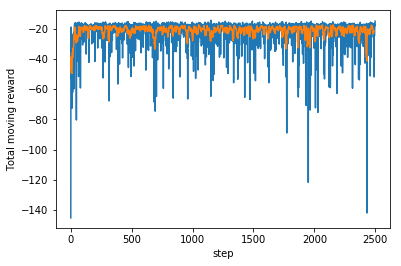

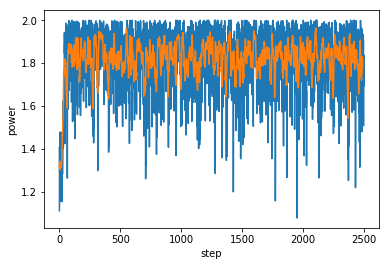

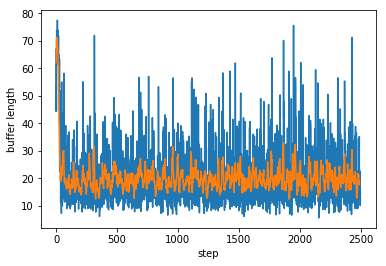

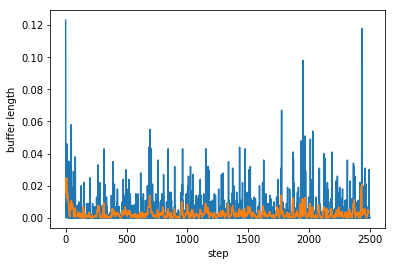

In [3]:
name = 't_10/test_1000_' + time.strftime("%b_%d_%Y_%H_%M_%S", time.localtime(time.time()))
a,b,c,d = plot_everything(res_rec, win=10)
np.savez(name, a,b,c,d)

In [1]:
cur_init_ds_ep = env.reset()
    
cur_r_ep = np.zeros(len(user_list))
cur_p_ep = np.zeros(len(user_list))
cur_n_ep = np.zeros(len(user_list))
cur_ts_ep = np.zeros(len(user_list))
cur_rs_ep = np.zeros(len(user_list))
cur_ps_ep = np.zeros(len(user_list))
cur_ds_ep = np.zeros(len(user_list))
cur_ch_ep = np.zeros(len(user_list))
    
for j in range(1000):
    # first try to transmit from current state
    [cur_r, done, cur_p, cur_n, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of] = env.step_transmit()
        
    cur_r_ep += cur_r
    cur_p_ep += cur_p
    cur_ts_ep += cur_ts
    cur_ps_ep += cur_ps
    cur_rs_ep += cur_rs
    cur_ds_ep += cur_ds
    cur_ch_ep += cur_ch
        
    print('%d:r:%f,p:%s,n:%s,tr:%s,pr:%s,rev:%s,dbuf:%s,ch:%s,ibuf:%s' % (j, cur_r, cur_p, cur_n, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_init_ds_ep))
        
print('r:%f,p:%s,n:%s,tr:%s,rev:%s,dbuf:%s,ch:%s,ibuf:%s' % (cur_r_ep/MAX_EPISODE_LEN, cur_p_ep/MAX_EPISODE_LEN, cur_n_ep/MAX_EPISODE_LEN, cur_ts_ep/MAX_EPISODE_LEN, cur_rs_ep/MAX_EPISODE_LEN, cur_ds_ep/MAX_EPISODE_LEN, cur_ch_ep/MAX_EPISODE_LEN, cur_init_ds_ep))

NameError: name 'env' is not defined

In [3]:
graph = tf.get_default_graph()
inputs = graph.get_tensor_by_name("input_1"+":0")
scaled_out = graph.get_tensor_by_name("output_1"+":0")
print sess.run(scaled_out, feed_dict={inputs: [[7.22254768,2.3384,2.7784888e-05]]})

[[0.78826445 1.        ]]


In [2]:
res_rec = []
res_init_buf = []
# 3. start to explore for each episode
for i in range(MAX_EPISODE):
    
    cur_init_ds_ep = env.reset(3)
        
    res_init_buf.append(cur_init_ds_ep)
    
    cur_r_ep = np.zeros(len(user_list))
    cur_p_ep = np.zeros(len(user_list))
    cur_ts_ep = np.zeros(len(user_list))
    cur_ps_ep = np.zeros(len(user_list))
    cur_rs_ep = np.zeros(len(user_list))
    cur_ds_ep = np.zeros(len(user_list))
    cur_ch_ep = np.zeros(len(user_list))
    cur_of_ep = np.zeros(len(user_list))
    
    res_rec_tmp = []
    for j in range(MAX_EPISODE_LEN):
        
        # first try to transmit from current state
        [cur_r, done, cur_p, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of] = env.step_transmit(False)
        
        res_rec_tmp.append([cur_r, done, cur_p, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of])
        cur_r_ep += cur_r
        cur_p_ep += cur_p
        cur_ts_ep += cur_ts
        cur_ps_ep += cur_ps
        cur_rs_ep += cur_rs
        cur_ds_ep += cur_ds
        cur_ch_ep += cur_ch
        cur_of_ep += cur_of
        
        if done:
            res_rec.append(res_rec_tmp)
            print('%d:r:%.4f,p:%.4f,tr:%.4f,pr:%.4f,rev:%.4f,dbuf:%.4f,ch:%.8f,ibuf:%d' % (i, cur_r_ep/MAX_EPISODE_LEN, cur_p_ep/MAX_EPISODE_LEN, cur_ts_ep/MAX_EPISODE_LEN, cur_ps_ep/MAX_EPISODE_LEN, cur_rs_ep/MAX_EPISODE_LEN, cur_ds_ep/MAX_EPISODE_LEN, cur_ch_ep/MAX_EPISODE_LEN, cur_init_ds_ep[0]))
                
name = 'test_1000_' + str(time.asctime( time.localtime(time.time()) )) + '.npy'
np.save(name, [res_rec, res_init_buf])

0:r:-50.8910,p:1.4033,tr:1.4707,pr:1.3505,rev:2.9594,dbuf:72.5261,ch:0.00002568,ibuf:4
1:r:-57.9454,p:1.3913,tr:1.6529,pr:1.2218,rev:3.0360,dbuf:74.1439,ch:0.00002761,ibuf:30
2:r:-51.0844,p:1.1953,tr:1.5476,pr:1.2320,rev:2.8984,dbuf:73.1955,ch:0.00002990,ibuf:39
3:r:-18.2811,p:1.3469,tr:1.5860,pr:1.3673,rev:2.9762,dbuf:61.5868,ch:0.00002683,ibuf:35
4:r:-17.5547,p:1.2180,tr:1.7657,pr:1.2518,rev:3.0115,dbuf:55.9275,ch:0.00003238,ibuf:63
5:r:-55.6239,p:1.4116,tr:1.4240,pr:1.3390,rev:2.8791,dbuf:69.1011,ch:0.00002492,ibuf:48
6:r:-37.3900,p:1.2706,tr:1.3830,pr:1.5578,rev:3.0240,dbuf:59.5109,ch:0.00002915,ibuf:8
7:r:-32.6223,p:1.4738,tr:1.3452,pr:1.6902,rev:3.0674,dbuf:63.5657,ch:0.00002512,ibuf:71
8:r:-20.8140,p:1.2057,tr:1.4394,pr:1.5456,rev:3.0451,dbuf:49.6221,ch:0.00002902,ibuf:38
9:r:-19.3836,p:1.1973,tr:1.4459,pr:1.4838,rev:2.9358,dbuf:56.0717,ch:0.00002922,ibuf:86


In [3]:
from mec_env_var import *
from helper import *
import tensorflow as tf
import ipdb as pdb
import time

MAX_EPISODE = 50
MAX_EPISODE_LEN = 1000

NUM_T = 1
NUM_R = 1
SIGMA2 = 0.3e-9

config = {'state_dim':3, 'action_dim':2};
train_config = {'minibatch_size':64, 'actor_lr':0.0001, 'tau':0.001, 
                 'critic_lr':0.001, 'gamma':0.99, 'buffer_size':250000, 
                 'random_seed':1234}
user_config = [{'id':'1', 'rate':3, 'dis':100, 'action_bound':1, 
                'data_buf_size':100, 't_factor':0.9, 'penalty':1000}];

print user_config
# 0. initialize the session object
sess = tf.Session() 
saver = tf.train.import_meta_graph('model/my_test_model.meta')
sess.run(tf.global_variables_initializer())

saver.restore(sess, tf.train.latest_checkpoint('model/'))

graph = tf.get_default_graph()
    
# 1. include all user in the system according to the user_config
user_list = [];
for info in user_config:
    info.update(config)
    user_list.append(MecTermLD(sess, info, train_config))
    print 'test'

# 2. create the simulation env
env = MecSvrEnv(user_list, NUM_R, SIGMA2, MAX_EPISODE_LEN)
env.init_target_network()

res_rec = []
res_init_buf = []
# 3. start to explore for each episode
for i in range(MAX_EPISODE):
    
    cur_init_ds_ep = env.reset(3)
        
    res_init_buf.append(cur_init_ds_ep)
    
    cur_r_ep = np.zeros(len(user_list))
    cur_p_ep = np.zeros(len(user_list))
    cur_ts_ep = np.zeros(len(user_list))
    cur_ps_ep = np.zeros(len(user_list))
    cur_rs_ep = np.zeros(len(user_list))
    cur_ds_ep = np.zeros(len(user_list))
    cur_ch_ep = np.zeros(len(user_list))
    cur_of_ep = np.zeros(len(user_list))
    
    res_rec_tmp = []
    for j in range(MAX_EPISODE_LEN):
        
        # first try to transmit from current state
        [cur_r, done, cur_p, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of] = env.step_transmit()
        
        res_rec_tmp.append([cur_r, done, cur_p, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of])
        cur_r_ep += cur_r
        cur_p_ep += cur_p
        cur_ts_ep += cur_ts
        cur_ps_ep += cur_ps
        cur_rs_ep += cur_rs
        cur_ds_ep += cur_ds
        cur_ch_ep += cur_ch
        cur_of_ep += cur_of
        
        if done:
            res_rec.append(res_rec_tmp)
            print('%d:r:%.4f,p:%.4f,tr:%.4f,pr:%.4f,rev:%.4f,dbuf:%.4f,ch:%.8f,ibuf:%d' % (i, cur_r_ep/MAX_EPISODE_LEN, cur_p_ep/MAX_EPISODE_LEN, cur_ts_ep/MAX_EPISODE_LEN, cur_ps_ep/MAX_EPISODE_LEN, cur_rs_ep/MAX_EPISODE_LEN, cur_ds_ep/MAX_EPISODE_LEN, cur_ch_ep/MAX_EPISODE_LEN, cur_init_ds_ep[0]))
                
name = 'test_1000_' + str(time.asctime( time.localtime(time.time()) )) + '.npy'
np.save(name, [res_rec, res_init_buf])
sess.close()

[{'data_buf_size': 100, 'penalty': 1000, 'rate': 3, 'action_bound': 1, 'id': '1', 't_factor': 0.9, 'dis': 100}]
INFO:tensorflow:Restoring parameters from model/my_test_model
--Return--
None
> <ipython-input-3-a12846566f97>(30)<module>()
     29 graph = tf.get_default_graph()
---> 30 pdb.set_trace()
     31 

ipdb> graph
ipdb> graph.trainable_variables
*** AttributeError: 'Graph' object has no attribute 'trainable_variables'
ipdb> tf.trainable_variables()
[<tf.Variable 'fully_connected/weights:0' shape=(3, 400) dtype=float32_ref>, <tf.Variable 'fully_connected/BatchNorm/beta:0' shape=(400,) dtype=float32_ref>, <tf.Variable 'fully_connected_1/weights:0' shape=(3, 300) dtype=float32_ref>, <tf.Variable 'fully_connected_1/BatchNorm/beta:0' shape=(300,) dtype=float32_ref>, <tf.Variable 'fully_connected_2/weights:0' shape=(300, 2) dtype=float32_ref>, <tf.Variable 'fully_connected_2/biases:0' shape=(2,) dtype=float32_ref>, <tf.Variable 'fully_connected_3/weights:0' shape=(3, 400) dtype=float32

BdbQuit: 

In [9]:
sess = tf.Session() 
saver = tf.train.import_meta_graph('model/my_test_model.meta')
sess.run(tf.global_variables_initializer())

saver.restore(sess, tf.train.latest_checkpoint('model/'))

graph = tf.get_default_graph()
variable_names = [v.name for v in tf.trainable_variables()]
values = sess.run(variable_names)
print sess.run('fully_connected_2/weights:0')

INFO:tensorflow:Restoring parameters from model/my_test_model
[[0.1545126  0.15780352]
 [0.15616506 0.15971294]
 [0.06559879 0.09880391]
 [0.06487427 0.10064688]
 [0.15168335 0.16229852]
 [0.06257845 0.09748891]
 [0.06430701 0.09924787]
 [0.06548443 0.10012874]
 [0.15782878 0.15414344]
 [0.15429462 0.17596859]
 [0.05945097 0.0991616 ]
 [0.06383383 0.09632684]
 [0.06522399 0.10438306]
 [0.06095436 0.09916781]
 [0.06635379 0.0955418 ]
 [0.06379106 0.09433711]
 [0.06133086 0.09875894]
 [0.06503102 0.09639146]
 [0.15047684 0.17412661]
 [0.15663381 0.15740666]
 [0.17768952 0.15899988]
 [0.15730077 0.14491995]
 [0.05902164 0.10017106]
 [0.06845198 0.09686822]
 [0.15724926 0.14774598]
 [0.1529071  0.16426612]
 [0.1520101  0.15706535]
 [0.16091335 0.16260217]
 [0.15082897 0.16070077]
 [0.06310375 0.09398151]
 [0.06018374 0.10056869]
 [0.05968894 0.10066012]
 [0.15474424 0.16255529]
 [0.15111688 0.1622602 ]
 [0.0838669  0.18973866]
 [0.06870251 0.24295035]
 [0.06702217 0.10505467]
 [0.1529     

In [3]:
np.save('t_08/1', [1])